# XGBoost 모델 테스트
---

In [109]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

## [1] 데이터 로딩
---

In [110]:
target = pd.read_csv("./target.csv")

data_civil = pd.read_csv("./data_tomato.csv")
data_ind = pd.read_csv("./data_tomato.csv")

data_civil.drop(columns=["DATE"], inplace=True)
data_ind.drop(columns=["DATE"], inplace=True)

In [111]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    300 non-null    object
 1   IND     300 non-null    int64 
 2   CIVIL   300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [112]:
data_civil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TCL_AT              300 non-null    float64
 1   TCL_LT              300 non-null    float64
 2   TCL_HT              300 non-null    float64
 3   TEMP_EF_CAP         300 non-null    float64
 4   TEMP_EF_DONGNAM     300 non-null    float64
 5   TEMP_EF_DAEGYUNG    300 non-null    float64
 6   TEMP_EF_CHOONG      300 non-null    float64
 7   TEMP_EF_HONAM       300 non-null    float64
 8   TEMP_EF_MEAN        300 non-null    float64
 9   POWER_WATER         300 non-null    int64  
 10  POWER_FIRE          300 non-null    int64  
 11  POWER_NUCLEAR       300 non-null    int64  
 12  POWER_NAEYEON       300 non-null    int64  
 13  POWER_GROUP         300 non-null    int64  
 14  POWER_TRANS         300 non-null    int64  
 15  POWER_GAS           300 non-null    int64  
 16  POWER_JU

In [113]:
data_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TCL_AT              300 non-null    float64
 1   TCL_LT              300 non-null    float64
 2   TCL_HT              300 non-null    float64
 3   TEMP_EF_CAP         300 non-null    float64
 4   TEMP_EF_DONGNAM     300 non-null    float64
 5   TEMP_EF_DAEGYUNG    300 non-null    float64
 6   TEMP_EF_CHOONG      300 non-null    float64
 7   TEMP_EF_HONAM       300 non-null    float64
 8   TEMP_EF_MEAN        300 non-null    float64
 9   POWER_WATER         300 non-null    int64  
 10  POWER_FIRE          300 non-null    int64  
 11  POWER_NUCLEAR       300 non-null    int64  
 12  POWER_NAEYEON       300 non-null    int64  
 13  POWER_GROUP         300 non-null    int64  
 14  POWER_TRANS         300 non-null    int64  
 15  POWER_GAS           300 non-null    int64  
 16  POWER_JU

## [2] 데이터 전처리
---

### [2-1] 데이터 분할

In [114]:
# 타겟 나누기
target_civil = target["CIVIL"]
target_ind = target["IND"]

In [115]:
# civil 데이터 분할
X_train_civil = data_civil.iloc[:264,:]
X_test_civil = data_civil.iloc[264:,:]

y_train_civil = target_civil[:264]
y_test_civil = target_civil[264:]

# ind 데이터 분할
X_train_ind = data_ind.iloc[:264,:]
X_test_ind = data_ind.iloc[264:,:]

y_train_ind = target_ind[:264]
y_test_ind = target_ind[264:]

In [59]:
print(X_train_civil.shape, y_train_civil.shape)
print(X_train_ind.shape, y_train_ind.shape)

(264, 29) (264,)
(264, 29) (264,)


### [2-2] 데이터 정규화

In [116]:
# 정규화 시키기
ss = StandardScaler()

# civil 데이터 정규화
X_train_civil_scaled = ss.fit_transform(X_train_civil)
X_test_civil_scaled = ss.fit_transform(X_test_civil)

# ind 데이터 정규화
X_train_ind_scaled = ss.fit_transform(X_train_ind)
X_test_ind_scaled = ss.fit_transform(X_test_ind)

### [2-3] 차원 축소

In [117]:
svd_civil = TruncatedSVD()
svd_ind = TruncatedSVD()

# civil 데이터 차원축소
svd_civil.fit(X_train_civil_scaled)
X_train_civil_svd = svd_civil.transform(X_train_civil_scaled)
X_test_civil_svd = svd_civil.transform(X_test_civil_scaled)

# ind 데이터 차원축소
svd_ind.fit(X_train_ind_scaled)
X_train_ind_svd = svd_ind.transform(X_train_ind_scaled)
X_test_ind_svd = svd_ind.transform(X_test_ind_scaled)

## [3] 모델
---

In [130]:
def make_xgb_model(X, y, test_X, test_y):
    model = xgb.XGBRegressor(max_depth=5)
    model.fit(X, y)
    print(model.score(test_X, test_y))
    
    return model

### [3-1] civil 모델

In [129]:
model_civil = make_xgb_model(X_train_civil_scaled, y_train_civil, X_test_civil_scaled, y_test_civil)

-3.996878230873677


In [126]:
# 예측 데이터
pred_civil = list(model_civil.predict(X_test_civil_scaled))
pred_civil_full = list(y_train_civil) + pred_civil

# 실제 데이터
civil = list(y_test_civil)
civil_full = list(y_train_civil) + civil

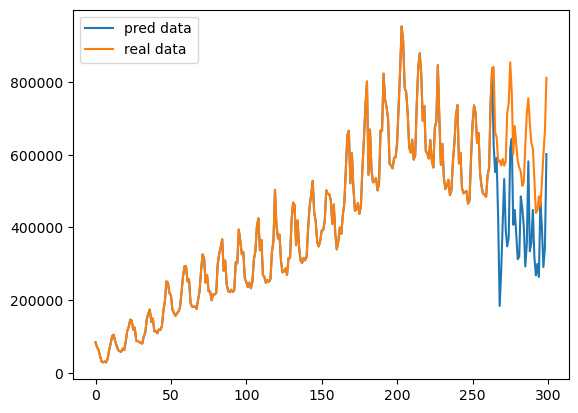

In [128]:
# 그림 그려서 확인하기
plt.plot(pred_civil_full, label="pred data")
plt.plot(civil_full, label="real data")
plt.legend()
plt.show()

### [3-2] ind 모델

In [131]:
model_ind = make_xgb_model(X_train_ind_scaled, y_train_ind, X_test_ind_scaled, y_test_ind)

0.9095233907954619


In [132]:
# 예측 데이터
pred_ind = list(model_ind.predict(X_test_ind_scaled))
pred_ind_full = list(y_train_ind) + pred_ind

# 실제 데이터
ind = list(y_test_ind)
ind_full = list(y_train_ind) + ind

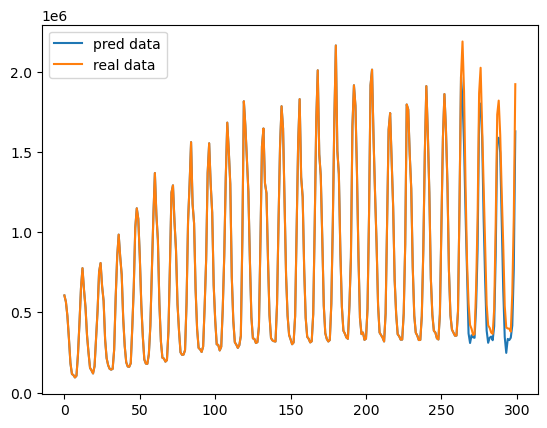

In [133]:
# 그림 그려서 확인하기
plt.plot(pred_ind_full, label="pred data")
plt.plot(ind_full, label="real data")
plt.legend()
plt.show()